# COGS 108 - Final Project 

# Overview

In the following notebook, we explore the Yelp dataset. Specifically, we analyze the data for restuarants on the app by comparing the average "stars" rating of restaurants in different categories and with different attributes. We seek to find if any of these categories or attributes affect the rating of their restaurants.

# Names

- Ethan Bull-Vulpe
- Cheuk Wah Chim
- Qingyu Shen
- Rongxin Zhu
- Tong Shen


# Research Question

Our broad question is: what features lead to the high rating of a restaurant on Yelp?

In our project, we seek to determine what makes a restaurant "successful" on Yelp. For our purposes, we say a restaurant is successful if it has a high average "stars" rating. Using this definition, we will work to find what features lead to a restaurant being successful. Some features we believe may influence average rating include: hours of operation, genre of food, cost, and other attributes. We will investigate some of these categories and others. Ultimately, we hope to see what factors affect the rating of a restaurant. However, we must limit our investigation to a realistic task, so we will not investigate all of these factors.

Specifically, we will investigate: What categories and attributes affect the rating of restaurants on the Yelp app? Here, category refers to type of food (ie: "American", "Japanese", etc.) and attribute refers to a restaurant bell and wistle (ie: "Wi-Fi", "Outdoor Seating", etc).

## Background and Prior Work


References (include links): "Key Elements of a Successful Restaurant" by Chris Milksen (https://smallbusiness.chron.com/key-elements-successful-restaurant-25545.html)

- Food is a part of everyone's daily lives. It affects many industries from 
  consumer and business perspectives. We want to analyze the Yelp dataset to 
  better understand the features that make a successful business in the food 
  industry. In this way, we hope to find correlations and relationships 
  between restaurant success to the restaurant's rating.
- The Yelp dataset is from the Yelp Dataset Challenge intended for student 
  use in order to research various things Yelp has suggested in challenges on 
  their webiste. We will mainly be focusing on restaurant businesses from
  Yelp dataset and use that to answer our question and hypothesis.
- According to "Key Elements of a Successful Restaurant", all successful 
  restaurants have the following attributes:
    - Food quality - The food quality of a restaurant plays an important role
      in determining the success of a restaurant as this is the foundational
      service that restaurants provide. Furthermore, different 
      types of restaurant have different kinds of expectation on their food. 
      For example, an expensive Italian restaurant with a rating of 5-stars is 
      expected to serve food that is excellent wholistically (eg. good taste,
      apetiziing appearance, and healthy). On the other hand, 
      at a fast food restaurant, people may not expect to be served as high 
      a quality of food, and may give more weight to factors such as taste over
      health and appearance.
    - Environment or atmosphere of the restaurant is another big aspect of whether 
      a restaurant can be successful. It is natural that a customer who 
      walks into a restaurant and sees a dirty floor and unclean dinner table 
      would walk out or rate with less stars, so it is important to have the environment 
      clean to be successful. Furthermore, a restaurant should always have its 
      restaurant's mood set up for its type of food. For example, an Itlian 
      restaurant would have dimmer lighting to produce a relaxing environment that makes 
      the customer feel a comfortable mood while enjoying their food.
    - Customer Service and Staff attitude - This is also a significant factor for successful 
      restaurants. Restaurants with better staff attitude or better customer 
      service would have a better success rate than those that don't. This is 
      when considering that when customers walk into a sit-down restaurant, they are not only 
      buying food, but also buying service from the restaurant. Therefore, it is 
      important that the restaurant have patient staff that can explain the 
      menu to the customer and show that they do care about the customer.
    - Cost - There are many costs of a restaurant, but there are 
      only a few that can be controlled. The utilities cost of a restaurant 
      can't be controlled, but the cost of labor and food can always be 
      controlled. Controlling the cost of labor and food is not suggesting 
      cutting corners on food quality, but instead controlling the amount of 
      food appropriately whether in portions or amounts of stock to keep. Also, 
      by controlling the cost of labor, it is suggesting making accommodations 
      according to the amount of customers expected to have. For example, if 
      not many customers are showing up, it might be better to send some of the 
      staff home earlier to minimize the cost of labor.

# Hypothesis


We hypothesize that certain factors, such as hours of operation, category of food, and attributes of the restaurant will influence the "stars" rating to a statistically significant degree. We believe that longer weekly hours would lead to higher rating, because people like when restaurants are open more often. We predict that some categories will be higher rated than others, because it is reasonable to assume that some genres of food are more popular than others, but do not attempt to predict which ones will be the highest rated. We also predict that restaurants with better features will have higher rating than other restaurants. For example, those that have parking lots will beat those that do not. Those that offer take out will beat those that do not. However, we think that genre of food will affect the distribution of ratings much more than these attributes because most people that go out to dine are looking for a specific type of food, with special bells and whistles only being a secondary consideration.

# Dataset(s)

- Dataset Name: Yelp Open Dataset
- Link to the dataset: https://www.yelp.com/dataset
- Number of observations: 192,609 businesses

For our project, we will use Yelp's public dataset. The dataset is very large (over 7 GB of data!) and has lots of information about a huge number of businesses including location, type of food, miscellaneous tags, list of reviews, and many other fields. However, we will only be investigating a subset of it, as explained in our Data Cleaning section.

The dataset contains information about all businesses on Yelp in a select few cities that Yelp has released the data for. It includes all information available in the app, such as hours of operation, business type, even the text of the reviews and photos of the restaurant. However we will only be looking at a bit of this information.

# Setup

These are all the libraries we will need to perform our data cleaning and analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest, mannwhitneyu
import scipy.stats as stats
import statistics

# Data Cleaning

## Part 0: Seperating Las Vegas data and basic setup

The Yelp dataset is very large, we chose to work with a smaller subset of it for a few reasons:
 * The full dataset is so large that it would take a long time to perform simple operations.
 * By only using the data from a specific city we can draw more specific conclusions.
 
For these reasons, we will only be looking at restaurants whose city is marked in the dataset as Las Vegas.

We seperated this part of the dataset into a smaller .json file so that we don't have to parse the entire dataset every time we run this notebook.

Before we can do any cleaning, we must read the json data into a pandas dataframe.

In [2]:
las_vegas = pd.read_json("las_vegas_res.json")

Now, lets take a peak at the top of the dataframe.

In [3]:
las_vegas.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
100018,4640 S Paradise Rd,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",JGM-SxW_vayu0fBch-U2FQ,"Italian, Pizza, Restaurants, Food, Food Delive...",Las Vegas,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",0,36.105416,-115.150459,Pizza Bella,89169,22,2.0,NV
100048,"5115 Spring Mountain Rd, Unit 234","{'OutdoorSeating': 'False', 'RestaurantsReserv...",5O7qB4gNmr3NgdYAuYbP4Q,"Indian, Pakistani, Halal, Himalayan/Nepalese, ...",Las Vegas,"{'Monday': '17:0-22:30', 'Tuesday': '17:0-22:3...",0,36.125693,-115.211278,Indian Curry House,89146,79,4.0,NV
100104,"5300 Spring Mountain Rd, Ste 107","{'Alcohol': 'u'full_bar'', 'Caters': 'True', '...",vtkJXE_Vdz27rWm6mfAw6Q,"Cantonese, Asian Fusion, Restaurants, Dim Sum,...",Las Vegas,"{'Monday': '9:0-1:0', 'Tuesday': '9:0-1:0', 'W...",0,36.126710,-115.213915,Cathay House Restaurant,89146,233,3.0,NV
100149,"The Palazzo, 3325 Las Vegas Blvd S","{'BusinessParking': '{'garage': True, 'street'...",liGn7sPOvUuy3kcwbhRkbA,"Chinese, Restaurants, Dim Sum",Las Vegas,"{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",0,36.124755,-115.168501,Zine Noodles Dim Sum,89109,238,3.0,NV
100164,4820 S Eastern Ave,"{'RestaurantsReservations': 'False', 'Restaura...",v0oHkLaA7cI9os6VZu6NZQ,"Restaurants, Mexican",Las Vegas,"{'Monday': '12:0-0:0', 'Tuesday': '12:0-0:0', ...",1,36.101732,-115.118541,Don Tortaco Mexican Grill,89119,11,3.0,NV


Then, lets remove the `address`, `business_id`, `is_open`, `latitude`, `longitude`, `name`, `postal_code`, and `state` columns, as they will not be used in our analysis. We keep the `categories`, `attributes`, `hours`, and `stars` columns because we will use them in our analysis.

In [4]:
las_vegas.drop(columns = ["address", "business_id", "is_open", "latitude", "longitude",
                          "name", "postal_code", "state"], inplace = True)

Now, because we want to create a model for `stars` we should try to remove outliers and unreliable data from our dataset. We shall remove all rows with `review_count` less than 50. In order to justify this, lets compare the percent of restaurants with less than 50 reviews that are 5 stars vs. those with 50 or more reviews.

In [5]:
las_vegas_less_than_fifty = las_vegas[las_vegas["review_count"] < 50]
las_vegas_more_than_fifty = las_vegas[las_vegas["review_count"] >= 50]
percent_five_stars_less_than = (
    len(las_vegas_less_than_fifty[las_vegas_less_than_fifty["stars"] == 5]
    ) / len(las_vegas_less_than_fifty)
)
print("Less than 50 reviews 5 star percent:", percent_five_stars_less_than)
percent_five_stars_more_than = (
    len(las_vegas_more_than_fifty[las_vegas_more_than_fifty["stars"] == 5]
    ) / len(las_vegas_more_than_fifty)
)
print("More than 50 reviews 5 star percent:", percent_five_stars_more_than)

Less than 50 reviews 5 star percent: 0.055591467356173235
More than 50 reviews 5 star percent: 0.00834326579261025


As you can see, restaurants with less than 50 reviews are more than 5 times as likely to have 5 stars. We believe this is because their star rating does not have a large enough sample size and may not have stablized. This could result in a poor model! Now, to fix this, lets drop all rows where `review_count` is less than 50. 

In [6]:
las_vegas = las_vegas[las_vegas["review_count"] >= 50]

## Part 1: Weekly Hours.

For the first part of our analysis, we will want to analyse how the number of hours a restaurant is open per week affects its `stars` rating. However, the `hours` data in the dataframe is saved in a dictionary that tells how many hours the restaurant is open per day. Lets parse the `hours` column into a new column `weekly_hours` that will make our analysis later easier.
First we define sum_time, a function which takes in the dictionary from the `hours` column of the dataframe and outputs the total number of hours that restaurant is open in a week. If the restaurant does not have its hours specified, we will put -1 in the `weekly_hours` column.

In [7]:
def sum_time(hours):
    total_time = 0
    if hours is None:
        return -1
    for time in hours.values():
        start_time = time[:time.index('-')]
        end_time = time[time.index('-') + 1:]
        start_hour = int(start_time[:start_time.index(':')])
        start_min = int(start_time[start_time.index(':') + 1:])
        end_hour = int(end_time[:end_time.index(':')])
        end_min = int(end_time[end_time.index(':') + 1:])
        start = start_hour + start_min / 60
        end = end_hour + end_min / 60
        if end < start:
            end += 24
        total_time += end - start
    return total_time

Now, we use that function to add a new column to our dataframe by iterating over each row.

In [8]:
las_vegas["weekly_hours"] = [sum_time(i) for i in las_vegas["hours"]]

## Part 2: Categories

For the second part of our analysis, we want to see if the distribution of `stars` differs for restaurants in different categories. Each restaurant in the dataset is labeled with one or more food categories. These categories describe the type or origin of the food. Examples inlcude "Burgers" or "Japanese".

Now, lets try to find the most common food categories. We will do this by making a dictionary that maps the name of the category to the number of restaurants in that category.

In [9]:
cat_dict = {}
for categories_string in las_vegas["categories"]:
    categories = categories_string.replace(" ", "").split(",")
    for category in categories:
        try:
            cat_dict[category] += 1
        except KeyError:
            cat_dict[category] = 1


Now lets take a look at the 10 most populous.

In [10]:
cat_top_10 = sorted(cat_dict.items(), key = lambda pair: pair[1])[-10:]
for category, count in cat_top_10:
    print(category, count)

Burgers 334
Sandwiches 366
Mexican 375
Breakfast&Brunch 417
American(New) 460
American(Traditional) 583
Bars 602
Nightlife 628
Food 948
Restaurants 3356


If we want to compare categories of restaurant, we should remove vague categories like 'Restaurants' and 'Food'. We do this because these categories don't point towards a specific food type, so are not interesting in our investigation.

In [11]:
cat_dict.pop("Restaurants", None)
cat_dict.pop("Food", None)

948

Now lets get the top 10 categories again.

In [12]:
cat_top_10 = sorted(cat_dict.items(), key = lambda pair: pair[1])[-10:]
for category, count in cat_top_10:
    print(category, count)

FastFood 318
Pizza 334
Burgers 334
Sandwiches 366
Mexican 375
Breakfast&Brunch 417
American(New) 460
American(Traditional) 583
Bars 602
Nightlife 628


Ok, this is much better, but lets do some more data cleaning. Some of these categories are redundant, lets further improve our dataset by combining similar categories. We must reconstruct cat_dict, because if we just combined "American(New)" and "American(Traditional)" we could count a restaurant twice if it was labeled in both of those categories.

We will combine any category with "american" as a substring into the "American" category.
We will combine any category with "nightlife" or "bar" into the "Nightlife" category because these restaurants are likely similar.
We will combine any category with "burgers" or "fastfood" into the "FastFood" category because burgers are commonly fastfood.

In [13]:
cat_dict = {}
for categories_string in las_vegas["categories"]:
    categories = categories_string.replace(" ", "").split(",")
    
    is_american = False
    is_nightlife = False
    is_fastfood = False
    
    for category in list(categories):
        if "american" in category.lower():
            is_american = True
            categories.remove(category)
        if "nightlife" in category.lower() or "bar" in category.lower():
            is_nightlife = True
            categories.remove(category)
        if "burgers" in category.lower() or "fastfood" in category.lower():
            is_fastfood = True
            categories.remove(category)
    
    if is_american:
        categories.append("American")
    if is_nightlife:
        categories.append("Nightlife")
    if is_fastfood:
        categories.append("FastFood")
            
    for category in categories:
        try:
            cat_dict[category] += 1
        except KeyError:
            cat_dict[category] = 1

cat_dict.pop("Restaurants", None)
cat_dict.pop("Food", None)

948

Now lets get the top 10 one last time.

In [14]:
cat_top_10 = sorted(cat_dict.items(), key = lambda pair: pair[1])[-10:]
for category, count in cat_top_10:
    print(category, count)

Seafood 284
Japanese 285
Italian 293
Pizza 334
Sandwiches 366
Mexican 375
Breakfast&Brunch 417
FastFood 553
American 909
Nightlife 1066


Excelent, these are a good 10 categories. Now, lets add all of these categories as columns to the las_vegas dataframe. Setting True or False in each row depending if that row's restaurant has that category.

In [15]:
for column_category, count in cat_top_10:
    column = []
    for categories_string in las_vegas["categories"]:
        categories = categories_string.replace(" ", "").split(",")

        is_american = False
        is_nightlife = False
        is_fastfood = False

        for category in list(categories):
            if "american" in category.lower():
                is_american = True
                categories.remove(category)
            if "nightlife" in category.lower() or "bar" in category.lower():
                is_nightlife = True
                categories.remove(category)
            if "burgers" in category.lower() or "fastfood" in category.lower():
                is_fastfood = True
                categories.remove(category)

        if is_american:
            categories.append("American")
        if is_nightlife:
            categories.append("Nightlife")
        if is_fastfood:
            categories.append("FastFood")
            
        if column_category in categories:
            column.append(True)
        else:
            column.append(False)
            
    las_vegas[column_category] = column

## Part 3: Attributes

For this part of our data cleaning, we want to look at how different attributes contribute to the difference of `stars` distribution among restaurants. Every restaurant has something listed under their attribute column, we want to take out 5 most common attributes that are listed under the `attribute` column. We will do this by creating a dictionary, mapping the name of the attribute to the number of how many restaurants have that attribute listed under their `attribute` column.

In [16]:
att_dict = {}
for key, value in las_vegas["attributes"].items() or []:
        for x in value or []:
            try:
                att_dict[x] += 1
            except KeyError:
                att_dict[x] = 1
att_top_5 = sorted(att_dict.items(), key = lambda pair: pair[1])[-5:]
for category, count in att_top_5:
    print(category, count)

GoodForKids 3261
BusinessParking 3291
RestaurantsTakeOut 3297
RestaurantsPriceRange2 3320
BusinessAcceptsCreditCards 3333


We can see that the 5 most popular attributes listed under attribute column from every restaurants are GoodForKids, BusinessParking, RestaurantsTakeOut, RestaurantsPriceRange2, and BusinessAcceptsCreditCards. Four of these categories are self explanatory, but for clarity, the fifth "RestaurantsPriceRange2", means the restaurant as two `$$` or fewer on Yelp, out of up to four `$$$$`. These will be the attributes we'll be mainly looking at in order to see if attributes contribute to differences in `stars` rating. Next, we will add the 5 most popular attributes as columns in our dataframe with a value of True or False. True meaning that restaurant does have that attributes, False meaning the opposite.

In [17]:
att_column_kid = []
att_column_park = []
att_column_takeout = []
att_column_price = []
att_column_card = []
temp_dict = las_vegas["attributes"]
for key, value in temp_dict.items():
    if value is not None:
        if "GoodForKids" not in value:
            att_column_kid.append(False)
        if "BusinessParking" not in value:
            att_column_park.append(False)
        if "RestaurantsTakeOut" not in value:
            att_column_takeout.append(False)
        if "RestaurantsPriceRange2" not in value:
            att_column_price.append(False)
        if "BusinessAcceptsCreditCards" not in value:
            att_column_card.append(False)
        for i, j in value.items():
            if i == "GoodForKids":
                if j.lower() == "true":
                    att_column_kid.append(True)
                else:
                    att_column_kid.append(False)
            if i == "BusinessParking":
                if "true" in j.lower():
                    att_column_park.append(True)
                else:
                    att_column_park.append(False)
            if i == "RestaurantsTakeOut":
                if j.lower() == "true":
                    att_column_takeout.append(True)
                else:
                    att_column_takeout.append(False)
            if i == "RestaurantsPriceRange2":
                if j == "2" or j == "1":
                    att_column_price.append(True)
                else:
                    att_column_price.append(False)
            if i == "BusinessAcceptsCreditCards":
                if j.lower() == "true":
                    att_column_card.append(True)
                else:
                    att_column_card.append(False)
    else:
        att_column_kid.append(False)
        att_column_park.append(False)
        att_column_takeout.append(False)
        att_column_price.append(False)
        att_column_card.append(False)
las_vegas["GoodForKids"] = att_column_kid
las_vegas["BusinessParking"] = att_column_park
las_vegas["RestaurantsTakeOut"] = att_column_takeout
las_vegas["RestaurantsPriceRange2"] = att_column_price
las_vegas["BusinessAcceptsCreditCards"] = att_column_card


# Data Analysis & Results

## Part 1: Weekly Hours

In this first part of the Analysis, we are going to see if hours open has any impact on the number of stars a restaurant has.

In order to do this, we must remove all restaurants that did not provide any weekly hours data. This includes those with a -1 in the `weekly_hours` column because those are the rows that had `None` for their operating hours and those with a 0 because these restuarants are either closed, or had no operating hours entered by mistake.

In [18]:
las_vegas_weekly_hours = (
    las_vegas[(las_vegas["weekly_hours"] != -1) & (las_vegas["weekly_hours"] != 0)]
)

Excellent, now that we have a dataframe with only those restaurants with weekly hours specified, lets graph the relationship.

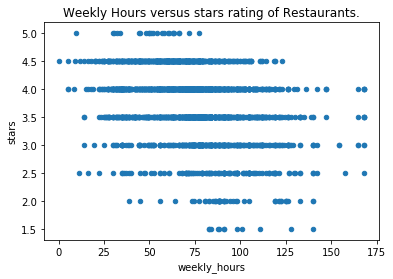

In [19]:
las_vegas_weekly_hours.plot(kind = "scatter", x = "weekly_hours", y = "stars",
    title = "Weekly Hours versus stars rating of Restaurants.")

Hmmmm, it really looks like theres no obvious relationship here. There are somethings we can notice, such as how 5 star restaurants are less likely to have many opearting hours. Or how there are no 24 hour restaurants with 4.5 or 5 stars. This could lead to an interesting conclusion about the operating hours of 5 star restaurants or the quality of 24-hour restaurants. But we decided not to pursue this analysis further for a few reasons:
 * The sample size of 5 star restaurants is too small.
 * The sample size of 24 hour restaurants is too small.
 * The correlation between `weekly_hours` and `stars` does not look to be large.

## Part 2: Categories

In part 2 of our analysis, we will pursue a different angle: How do different food categories affect `stars`? Here we will use the extra columns we created during our data cleaning in order to analyse how the top 10 most common food categories affect rating.

To start, lets graph histograms of the `stars` distribution for each of the different categories we plan to investigate. We'll do that with a quick loop.

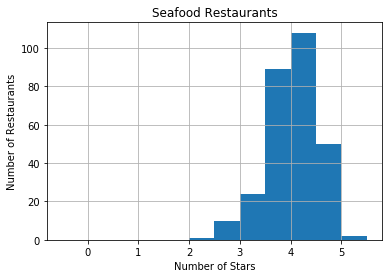

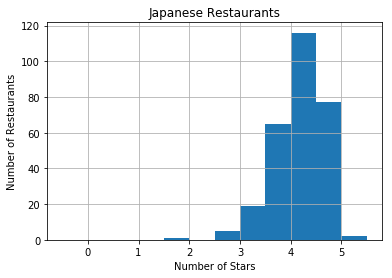

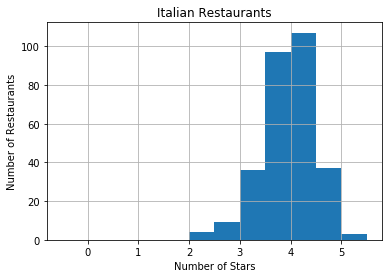

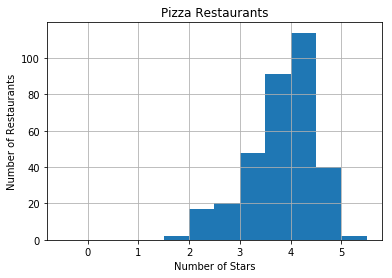

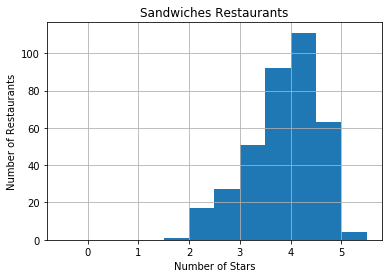

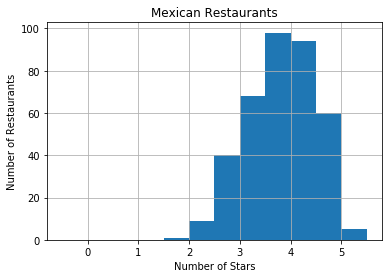

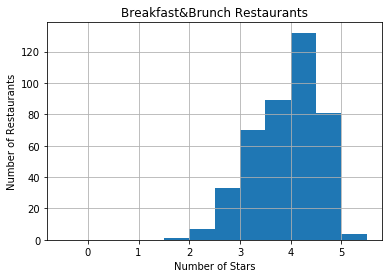

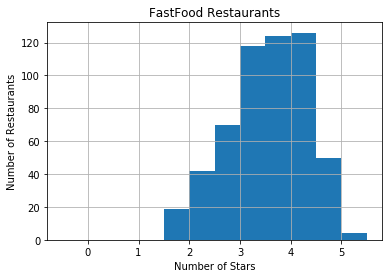

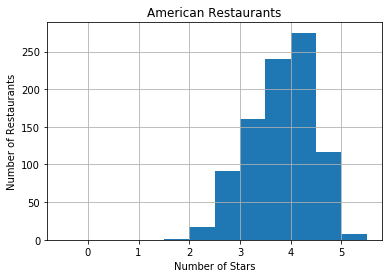

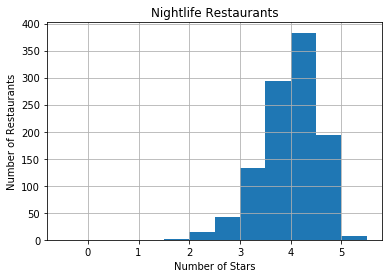

In [20]:
for category, count in cat_top_10:
    cat_df = las_vegas[las_vegas[category] == True]
    chart = cat_df.hist(column = "stars", bins = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5,
                                                  3, 3.5, 4, 4.5, 5, 5.5])
    for ax in chart.flatten():
        ax.set_xlabel("Number of Stars")
        ax.set_ylabel("Number of Restaurants")
        ax.set_title(category + " Restaurants")

As we can see from the above graphs, all of the categories  have their maximum number of restaurants sitting at around 3.5 stars to 4.5 stars. However, it looks to be skewed left. This could cause inconviences for the next step in our analysis. Since these 10 categories are the most populous among all others, we will investigate to see if the distribution of those restaurants in each category is different from those out of each category. 

Our goal is to see if there is significant difference between the `stars` rating of restaurants in different categories. To do this, we want to use a t-test. But before we can do that, we must see if the data for each category is normally distributed. We will use an alpha value of 0.01. If both the distribution of restaurants in a category and those out of the category have normally distributed ratings, then we will add them to the list `normal_categories`. At the end of this code block, the list will contain all categories of restaurant for which the `stars` rating is normally distributed.

In [21]:
p = 0.01
normal_categories = []
for category, count in cat_top_10:
    in_cat = las_vegas[las_vegas[category] == True]["stars"].values
    out_cat = las_vegas[las_vegas[category] == False]["stars"].values
    
    st_in, p_in = normaltest(in_cat)
    st_out, p_out = normaltest(out_cat)
    
    if p_in >= p and p_out >= p:
        normal_categories.append(category)
        
    print(category + ":", "p for those in category:", p_in)
    print(category + ":", "p for those out of category:", p_out)
    
print("Normal Categories:", normal_categories)
    

Seafood: p for those in category: 0.00167835860485
Seafood: p for those out of category: 2.92030501396e-40
Japanese: p for those in category: 1.27812580568e-09
Japanese: p for those out of category: 6.68673314685e-38
Italian: p for those in category: 0.00054779932962
Italian: p for those out of category: 1.66641084376e-41
Pizza: p for those in category: 1.26653881571e-06
Pizza: p for those out of category: 9.62744398723e-41
Sandwiches: p for those in category: 4.73492347268e-05
Sandwiches: p for those out of category: 1.67800432918e-42
Mexican: p for those in category: 0.0026794475926
Mexican: p for those out of category: 6.34841144578e-48
Breakfast&Brunch: p for those in category: 8.01971489664e-05
Breakfast&Brunch: p for those out of category: 8.73367592313e-44
FastFood: p for those in category: 3.45911723293e-05
FastFood: p for those out of category: 6.98250892332e-33
American: p for those in category: 5.24923564013e-07
American: p for those out of category: 2.3525534484e-47
Nightli

Uh, oh... none of the categories are added to `normal_categories`. This means that when using an alpha value of 0.01, there are no categories for which `stars` is normally distributed for both those restuarants in and out of the category. Lets get a visual for the first few categories comparing the actual distribution of restuarants in those categories with the normal distribution.

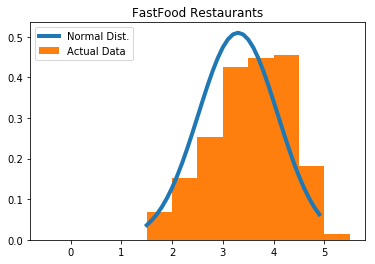

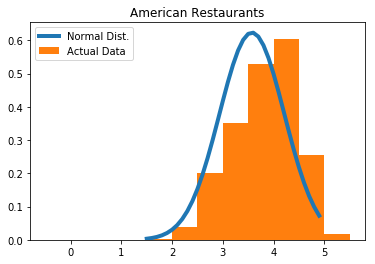

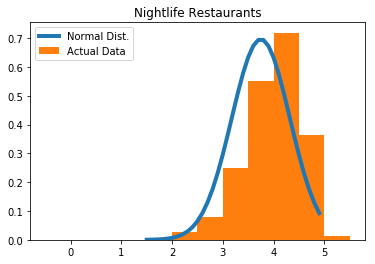

In [22]:
p = 0.01
for category, count in cat_top_10[-3:]:
    in_cat = las_vegas[las_vegas[category] == True]["stars"].values
    out_cat = las_vegas[las_vegas[category] == False]["stars"].values
    
    fig1, ax1 = plt.subplots()
    xs = np.arange(in_cat.min(), in_cat.max(), 0.1)
    fit = stats.norm.pdf(xs, np.mean(in_cat), np.std(in_cat))
    ax1.plot(xs, fit, label='Normal Dist.', lw=4)
    ax1.hist(in_cat, density=True, label='Actual Data', bins = [-0.5, 0, 0.5, 1, 1.5,
                                                                2, 2.5,3, 3.5, 4,
                                                                4.5,5, 5.5]);
    ax1.set_title(category + " Restaurants")
    ax1.legend();


As we can see, the data really isn't normal. In fact, its so un-normal that even using an alpha value of 0.001, every single `normal_test()` would fail. One option is to attempt to normalize the data, however we decided against this because there is another good test we can use. Because we have ordinal non normal data, a Mann Whitney U test is our best option to see if the distributions differ. Here, we run a Mann Whittney U test on each pair of in-category/out-category resturaunts. For each category that does have a significant affect on the median rating using an alpha value of 0.01, we will add the name of that category and the difference in median to significant_difference_categories.

In [23]:
significant_difference_categories = []

for category, count in cat_top_10:
    in_cat = las_vegas[las_vegas[category] == True]["stars"].values
    out_cat = las_vegas[las_vegas[category] == False]["stars"].values
    
    stat, p = mannwhitneyu(in_cat, out_cat)
        
    print(category, p)
    
    if p < 0.01:
        significant_difference_categories.append(
            (category, statistics.median(in_cat) - statistics.median(out_cat))
        )

print()
print("Significant difference categories:")
for category, difference in significant_difference_categories:
    print(category, difference)

Seafood 0.00046379496769
Japanese 2.45266863098e-14
Italian 0.189030451456
Pizza 0.028171909811
Sandwiches 0.273150028855
Mexican 0.00204388748005
Breakfast&Brunch 0.225432045919
FastFood 7.60849430223e-33
American 4.29191455872e-07
Nightlife 1.29226042873e-07

Significant difference categories:
Seafood 0.5
Japanese 0.5
Mexican -0.5
FastFood -0.5
American -0.5
Nightlife 0.5


So here we see that according to our U-test, Seafood, Japanese, and Nightlife restaurants have a median star rating 0.5 higher than correspondingly, non Seafood, non Japanese, and non Nightlife restaurants. And Mexican, FastFood, and American restuarants have a median star rating 0.5 lower than, correspondingly, non Mexican, Fastfood, and American restuarants. This 0.5 difference may seem small, but considering the scale only goes from 0 to 5, 0.5 is about 1/10th of the entire scale!

## Part 3: Attributes

For this part of our analysis, we want to look at how attributes affect `stars` rating on restaurants. We will use the 5 columns we added to our dataframe to analyze how these top 5 attributes affect `stars` rating of restaurants.

We first want to print out the histograms showing the stars distribution of the top 5 attributes to see how it might have effect on `stars` ratings of restaurants.

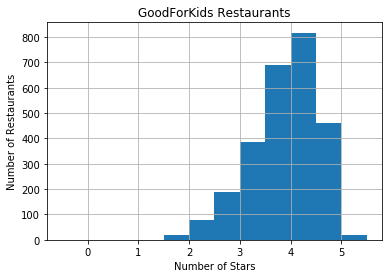

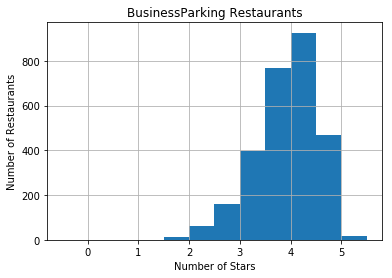

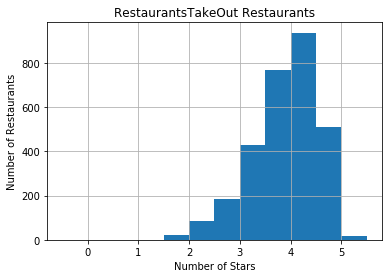

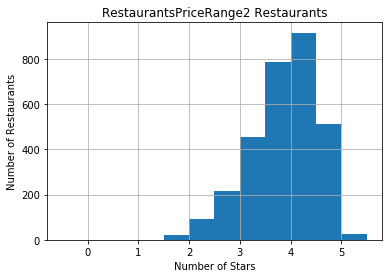

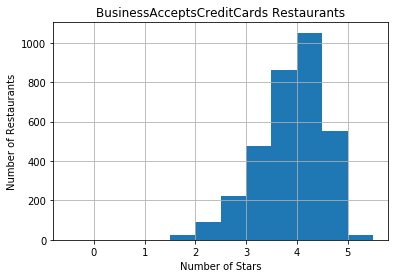

In [24]:
for attribute, count in att_top_5:
    att_df = las_vegas[las_vegas[attribute] == True]
    att_chart = att_df.hist(column = "stars", bins = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5,
                                                      3, 3.5, 4, 4.5, 5, 5.5])
    for axis in att_chart.flatten():
        axis.set_xlabel("Number of Stars")
        axis.set_ylabel("Number of Restaurants")
        axis.set_title(attribute + " Restaurants")

As we can see from the attributes graphs above, majority of the restaurants are clustered around 3.5 stars and 4.5 stars possibly indicating that attributes have effect on `stars` rating. Once again, there is a large left skew.

So we want to see if there is significant difference between restaurants in different attributes. To do this, we want to use a t-test. But before we can do that, we must see if the data for each attribute is normally distributed. We will use an alpha value of 0.01. If both the distribution of restaurants in a attribute and those out of the attribute have normally distributed ratings, then we will add them to the list `normal_attributes`. After performing the below code block, the list will contain all attributes of restaurant for which the `stars` rating is normally distributed.

In [25]:
p = 0.01
normal_attributes = []
for attribute, count in att_top_5:
    in_cat = las_vegas[las_vegas[attribute] == True]["stars"].values
    out_cat = las_vegas[las_vegas[attribute] == False]["stars"].values
    
    st_in, p_in = normaltest(in_cat)
    st_out, p_out = normaltest(out_cat)
    
    if p_in >= p and p_out >= p:
        normal_attributes.append(attribute)
        
    print(attribute + ":", "p_in", p_in, "p_out", p_out)
    
print("Normal Attributes:", normal_attributes)

GoodForKids: p_in 2.06387344892e-36 p_out 2.14562780732e-09
BusinessParking: p_in 2.30355005382e-39 p_out 2.78569578008e-07
RestaurantsTakeOut: p_in 3.02491017208e-44 p_out 0.00310761264759
RestaurantsPriceRange2: p_in 4.71382958481e-37 p_out 2.21748938162e-05
BusinessAcceptsCreditCards: p_in 2.887549172e-45 p_out 0.00499278945418
Normal Attributes: []


 Since `normal_attributes` is empty, that means no attributes for which `stars` is normally distributed for both restaurants that are in and out of the attribute with an alpha value of 0.01. Now let's graph the normal distribution versus our actual data to better see what is going on for a few of the attributes.

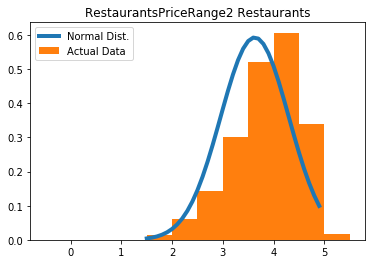

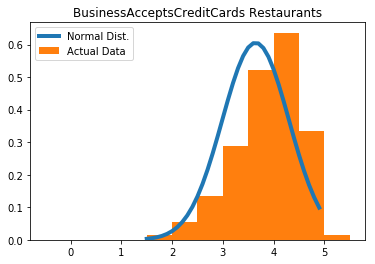

In [26]:
p = 0.01
for attribute, count in att_top_5[-2:]:
    in_cat = las_vegas[las_vegas[attribute] == True]["stars"].values
    out_cat = las_vegas[las_vegas[attribute] == False]["stars"].values
    
    fig2, ax2 = plt.subplots()
    xs = np.arange(in_cat.min(), in_cat.max(), 0.1)
    fit = stats.norm.pdf(xs, np.mean(in_cat), np.std(in_cat))
    ax2.plot(xs, fit, label='Normal Dist.', lw=4)
    ax2.hist(in_cat, density=True, label='Actual Data', bins = [-0.5, 0, 0.5, 1, 1.5,
                                                                2, 2.5, 3, 3.5, 4,
                                                                4.5, 5, 5.5]);
    ax2.set_title(attribute + " Restaurants")
    ax2.legend();


As we can see, the data is not normal at all. The data is extremely un-normal that even using an alpha value of 0.001 wouldn't pass the `normal_test()`. Alternative option is to try to normalize the data, however, we decided not to because there is yet another good test we can use. It is because we have ordinal non-normal data, a Mann Whitney U test is one of our best option to see if the distributions differ. We can simply run a Mann Whittney U test on each pair of in-attribute/out-attribute resturaunts. For each attribute that does have a significant affect on the median rating using an alpha value of 0.01, we will add the name of that attribute and the difference in median to significant_difference_attributes.

In [27]:
significant_difference_attributes = []

for attribute, count in att_top_5:
    in_cat = las_vegas[las_vegas[attribute] == True]["stars"].values
    out_cat = las_vegas[las_vegas[attribute] == False]["stars"].values
    
    stat, p = mannwhitneyu(in_cat, out_cat)
        
    print(attribute, p)
    
    if p < 0.01:
        significant_difference_attributes.append(
            (attribute, statistics.median(in_cat) - statistics.median(out_cat))
        )

print()
print("Significant difference attributes:")
for attribute, difference in significant_difference_attributes:
    print(attribute, difference)

GoodForKids 0.0172658541586
BusinessParking 0.0030522327164
RestaurantsTakeOut 0.479905046224
RestaurantsPriceRange2 4.3741945257e-08
BusinessAcceptsCreditCards 0.00275497329698

Significant difference attributes:
BusinessParking 0.5
RestaurantsPriceRange2 -0.5
BusinessAcceptsCreditCards -0.5


From the result above, we can see in our U-test, BusinessParking restaurants have a median star rating 0.5 higher than non BusinessParking restaurants. RestaurantsPriceRange2 and BusinessAcceptsCreditCards restuarants have a median star rating 0.5 lower than non RestaurantsPriceRange2 and BusinessAcceptsCreditCards restuarants. Again, the 0.5 difference may seem small, but considering the scale only goes from 0 to 5, 0.5 is about 1/10th of the entire scale!

It might strike you as odd that Businesses that accept credit cards are rated lower than those that do not. However, there is an explanation for this:

In [28]:
no_credit = las_vegas[las_vegas["BusinessAcceptsCreditCards"] == False]
no_credit.shape

(53, 22)

There are only 53 restaurants that don't accept credit cards in our dataset. It could be that the observation that Businesses that do not accept credit cards are rated better than those that do was only possible because of the relatively small sample size.

# Ethics & Privacy

Data used for this project was ethically and consensually collected by Yelp and available for public use. While personal information is included in our dataset, such as names, logitude, and latitude of restaurants, meaning it is non-anonymous, this is not ethically damaging because the data in the dataset is public information that is already available on the Yelp app.

There are several players who may be interested in our findings, namely the Yelp corporation and businesses which use the app. It is possible that making the facets of a successful Yelp restaurant publicly known could entice business owners or others to fraud - perhaps claiming that their business has attributes it does not because those attributes are correltated with a successful restaurant.

Additionally, there are some potential biases in the dataset. Review fraud is possible and some would argue common on websites such as Yelp, as seen in ["Don't Fall for Fake Reviews: I-Team Uncovers Them on Yelp, Facebook, Google"](https://www.nbclosangeles.com/investigations/Fake-Reviews-on-Yelp-Facebook-Google-447796103.html) by Joel Grover and Amy Corral and ["How to Buy Yelp Reviews"](https://blog.hubspot.com/service/buy-yelp-reviews) by Swetha Amaresan. However, Yelp's official position is that this is not the case. Additionally, our dataset contains all the flaws that exist in any opt-in review dataset. It is possible that pleased customers are less likely to review than displeased customers, or that businesses who let their patrons know they are on Yelp with decals or other paraphernalia will have more or different reviews. Utimately, it is impossible to know exactly how these biases will affect our dataset, so we aknowledge that our conclusions are vulnerable to these faults. This is a shortcoming that many analyses that rely on survey data suffer.

# Conclusion & Discussion

Through our analysis we are able to draw the preliminary conclusions about parts of our hypothesis. We could not confirm that longer weekly hours lead to higher rating, because the relationship between weekly hours and `stars` rating was very weak if existant at all. We confirmed that some categories of restaurant have differently distrubyted `stars` ratings (either better or worse). And we confirmed that restaurants with different attributes have differently distributed `stars` ratings. We predicted that good attributes would be correlated with better rating, this was confirmed in regards to 'BusinessParking' which showed a higher distributed rating, but refuted in regards to 'RestaurantsTakeOut' and 'GoodForKids' which showed no signficant difference in rating.

So in summary: We have found that restaurants in the categories Seafood, Japanese, and Nightlife or that have parking show a higher distribution of ratings that those not in those categories or that do not have parking by 0.5 star increase in median. We also found that restaurants in the categories  Mexican, FastFood, and American or that have two `$$` or fewer dollar signs show a low distribution of ratings than those not in those categories or that have three `$$$` or more dolars signs by 0.5 star decrease in median. There were also several categories and attributes we found to not have an effect.

However, these results are only preliminary for several reasons.
 * They look only at a single city, the results could be different for different cities or the population at large.
 * They are exposed to the biases discused in the ethics and privacy section.
 * More categories and attributes should be investigated before drawing concrete conclusions.
 * Location of the restaurants might contribute whether the restaurant is rated higher or lower.
 * The race of the population might also affect ratings of restaurants, as in how different race have their different preferred 
   type of food.